In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = base.classes.station  
measurement = base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = (session.query(measurement.date)
               .order_by(measurement.date.desc())
               .first())

recent_date

('2017-08-23')

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date
# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=366)

print('Query Date:', one_year_prior)


# Perform a query to retrieve the data and precipitation scores

precip_scores = (session.query(measurement.date,func.max(measurement.prcp))
                 .filter(func.strftime('%Y-%m-%d', measurement.date) > one_year_prior)
                 .group_by(measurement.date)
                 .all())

precip_scores

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_scores, columns = ['date', 'precip'])

precip_df.set_index('date', inplace = True)
# Sort the dataframe by date

precip_df.sort_values('date')

precip_df.head(12)


Query Date: 2016-08-22


,precip
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46


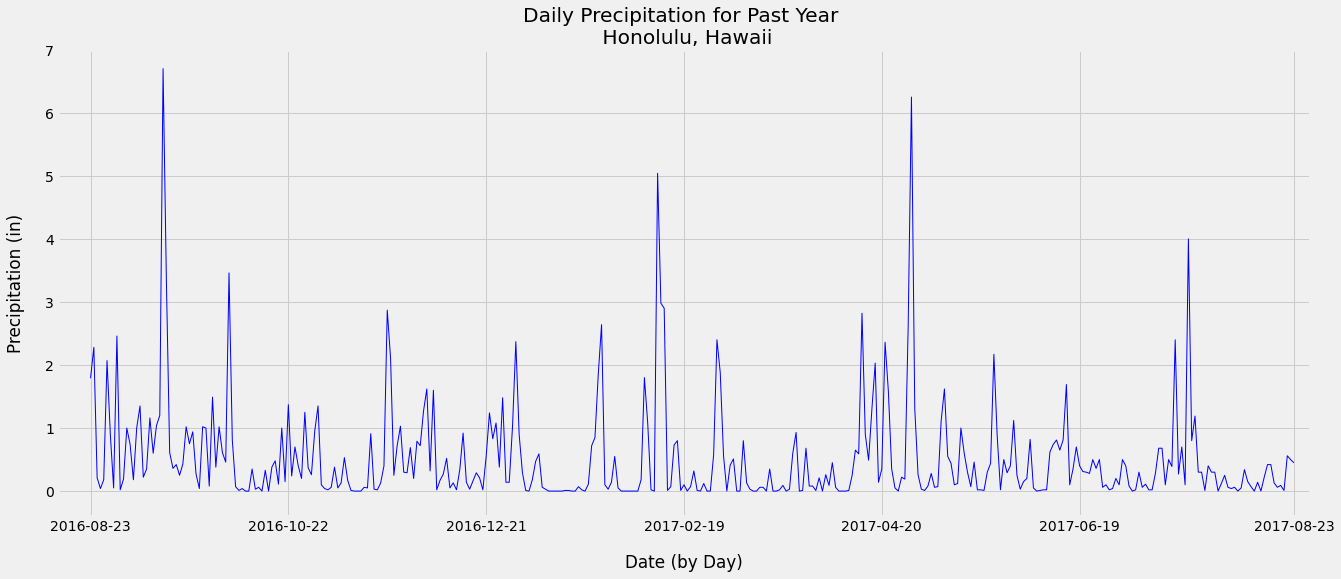

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(20, 8)
precip_df.plot(linewidth = 1, 
               alpha = 1,
               rot = 0,
               xticks = (0,60,120,180,240,300,365),     
               color = 'blue')

plt.xlim(-10, 370)
plt.ylim(-0.4,7)
plt.legend('',frameon = False)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.xlabel('Date (by Day)', labelpad= 20)
plt.ylabel('Precipitation (in)', labelpad= 20)
plt.title('Daily Precipitation for Past Year \n Honolulu, Hawaii')
plt.show()

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_stats = (session.query(measurement.date, measurement.prcp)
                .filter(measurement.date > one_year_prior)
                .all())

precip_stats_df = pd.DataFrame(precip_stats, columns = ['date', 'prcp'])

precip_stats_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).count()

print(f'There is a total of {total_stations} stations at Honolulu, Hawaii.')

There is a total of 9 stations at Honolulu, Hawaii.


In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mactive_stations = (session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())

mactive_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc = [measurement.station,
        func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)]

most_activest = (session.query(*calc)
                 .filter(measurement.station=='USC00519281')
                 .all())

most_activest_df = pd.DataFrame(most_activest, columns = ['station', 
                                                          'min_temp', 
                                                          'max_temp', 
                                                          'avg_temp'])

most_activest_df.set_index('station', inplace=True)
most_activest_df

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_top_station = (session.query(measurement.date,(measurement.tobs))
                    .filter(func.strftime(measurement.date) > one_year_prior)
                    .filter(measurement.station=='USC00519281')
                    .all())
year_top_station

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

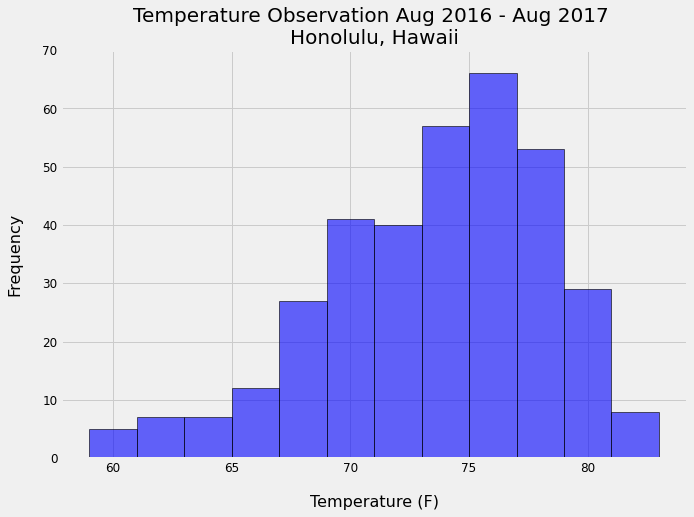

In [75]:
year_top_station_df = pd.DataFrame(year_top_station)
year_top_station_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(year_top_station_df['tobs'],
         bins=12,
         alpha=0.6,
         edgecolor='black',
         linewidth=1,
         color='blue')

plt.title('Temperature Observation Aug 2016 - Aug 2017 \nHonolulu, Hawaii',fontsize=20)
plt.xlabel('Temperature (F)',fontsize=16,labelpad=20)
plt.ylabel('Frequency',fontsize=16,labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()


# Close session

In [76]:
# Close Session
session.close()